In [1]:
#This notebook was created in order to use a different approach to model the properties of different nanocellulose
# feedstock sources and pre-treatment processes. 

In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

# splitting
from sklearn.model_selection import train_test_split

# models
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sns.set_style('white')

In [3]:
# Creating dataframe
df = pd.read_excel(r'C:\Users\Solange Iamin\Documents\Mestrado_UFPR\Pesquisa_PRH\Modelos\Props_nanoceluloses_2\tabela_dados_2.xlsx')

# we know that the columns "Sample" should be the index of the table
df.index = df["Sample"]
df.drop("Sample", axis =1, inplace = True)
df

,Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Insoluble lignin (wt.%),Soluble lignin (wt.%),Extractives (wt.%),Ashes (wt.%),CrI (%),Aspect ratio,Yield of nanofibrillation (%)
Sample,,,,,,,,,,,,,,
Eucamec(3),184,0.095,5.67,0.2646,0.308,0.742,0.174,0.008,0.058,0.013,0.005,NaN,155,0.102366
Eucamec(3+1),195,0.107,7.73,0.3936,0.296,0.742,0.174,0.008,0.058,0.013,0.005,NaN,168,0.115687
Eucamec(3+3),208,0.132,11.67,1.3856,0.267,0.742,0.174,0.008,0.058,0.013,0.005,NaN,179,0.165490
Eucamec(3+3+1),213,0.166,14.59,1.6720,0.273,0.742,0.174,0.008,0.058,0.013,0.005,NaN,200,0.189679
Eucamec(3+3+3),215,0.194,19.72,2.0968,0.245,0.742,0.174,0.008,0.058,0.013,0.005,NaN,220,0.204288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RecHenz240(3),176,0.075,5.67,1.0154,0.318,0.551,0.153,0.156,0.049,0.010,0.081,NaN,71,0.092897
RecHenz240(3+1),189,0.118,7.73,1.5009,0.253,0.551,0.153,0.156,0.049,0.010,0.081,NaN,72,0.138071
RecHenz240(3+3),205,0.184,11.67,1.6471,0.229,0.551,0.153,0.156,0.049,0.010,0.081,NaN,75,0.203436


In [4]:
df.columns

Index(['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"',
       'Flow index "n"', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)',
       'Insoluble lignin (wt.%)', 'Soluble lignin (wt.%)',
       'Extractives (wt.%)', 'Ashes (wt.%)', 'CrI (%)', 'Aspect ratio',
       'Yield of nanofibrillation (%)'],
      dtype='object')

In [5]:
# Summing soluble and insoluble ligning (so to get total ligning in raw material)
df['Total lignin (wt.%)'] = df['Insoluble lignin (wt.%)'] + df['Soluble lignin (wt.%)']
df_2 = df[['Cationic demand (µeq/g)','Transmittance at 600 nm (%)','HPH - Energy consumption (kWh/kg)','Consistency index "k"','Flow index "n"','Cellulose (wt.%)','Hemicellulose (wt.%)','Total lignin (wt.%)','Extractives (wt.%)','Ashes (wt.%)','Aspect ratio',
       'Yield of nanofibrillation (%)']]
display(df_2)

,Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%),Aspect ratio,Yield of nanofibrillation (%)
Sample,,,,,,,,,,,,
Eucamec(3),184,0.095,5.67,0.2646,0.308,0.742,0.174,0.066,0.013,0.005,155,0.102366
Eucamec(3+1),195,0.107,7.73,0.3936,0.296,0.742,0.174,0.066,0.013,0.005,168,0.115687
Eucamec(3+3),208,0.132,11.67,1.3856,0.267,0.742,0.174,0.066,0.013,0.005,179,0.165490
Eucamec(3+3+1),213,0.166,14.59,1.6720,0.273,0.742,0.174,0.066,0.013,0.005,200,0.189679
Eucamec(3+3+3),215,0.194,19.72,2.0968,0.245,0.742,0.174,0.066,0.013,0.005,220,0.204288
...,...,...,...,...,...,...,...,...,...,...,...,...
RecHenz240(3),176,0.075,5.67,1.0154,0.318,0.551,0.153,0.205,0.010,0.081,71,0.092897
RecHenz240(3+1),189,0.118,7.73,1.5009,0.253,0.551,0.153,0.205,0.010,0.081,72,0.138071
RecHenz240(3+3),205,0.184,11.67,1.6471,0.229,0.551,0.153,0.205,0.010,0.081,75,0.203436


In [6]:
# Checking only correlation variables between variables and Yield of nanofibrillation
df_2.corr().abs()['Yield of nanofibrillation (%)'].sort_values(ascending=False)

Yield of nanofibrillation (%)        1.000000
Transmittance at 600 nm (%)          0.981898
HPH - Energy consumption (kWh/kg)    0.726261
Cationic demand (µeq/g)              0.692499
Consistency index "k"                0.282223
Extractives (wt.%)                   0.242188
Flow index "n"                       0.226128
Aspect ratio                         0.059417
Total lignin (wt.%)                  0.046724
Ashes (wt.%)                         0.042045
Hemicellulose (wt.%)                 0.041159
Cellulose (wt.%)                     0.016527
Name: Yield of nanofibrillation (%), dtype: float64

In [7]:
from sklearn.utils import shuffle

In [8]:
#shuffling data
from sklearn.utils import shuffle
original_df = shuffle(df_2, random_state=0)

# separating features and targets dataframes

# For the independent features:

X = original_df.iloc[:,0:-2].copy()

# For the targets:

#y_AR = original_df.iloc[:,-2].copy()
y_YI = original_df.iloc[:,-1].copy()

In [9]:
X

,Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%)
Sample,,,,,,,,,,
Hempmec(3),134,0.0350,5.67,1.4372,0.166,0.872,0.068,0.040,0.012,0.007
HempHenz240(3+3+3),221,0.2120,19.72,1.1170,0.262,0.878,0.067,0.043,0.005,0.006
EucaHenz80(3+3),216,0.1880,11.67,1.1993,0.193,0.788,0.135,0.068,0.005,0.004
HempHenz80(3),151,0.0690,5.67,0.1308,0.491,0.887,0.055,0.047,0.006,0.006
Aspenmec(3+3),196,0.1280,11.67,0.6667,0.369,0.471,0.194,0.313,0.008,0.013
...,...,...,...,...,...,...,...,...,...,...
EucaHenz80(3+3+3),232,0.2412,19.72,1.7978,0.125,0.788,0.135,0.068,0.005,0.004
AspenHenz240(3+3+1),230,0.2180,14.59,1.8546,0.195,0.464,0.182,0.330,0.009,0.015
SisalHenz80(3+3),194,0.1490,11.67,0.3665,0.511,0.887,0.159,0.061,0.012,0.007


In [10]:
y_YI

Sample
Hempmec(3)             0.050913
HempHenz240(3+3+3)     0.240456
EucaHenz80(3+3)        0.209500
HempHenz80(3)          0.065390
Aspenmec(3+3)          0.145699
                         ...   
EucaHenz80(3+3+3)      0.249400
AspenHenz240(3+3+1)    0.237231
SisalHenz80(3+3)       0.160236
TMPHenz240(3+3)        0.157330
Hempmec(3+3)           0.095259
Name: Yield of nanofibrillation (%), Length: 140, dtype: float64

In [11]:
# train, validation and test splits for aspect ratio

X_train_YI, X_test_YI, y_train_YI, y_test_YI = train_test_split(X, y_YI, train_size = 0.7, test_size = 0.3, random_state = 78)

X_test_YI, X_val_YI, y_test_YI, y_val_YI = train_test_split(X_test_YI, y_test_YI, train_size = 0.5, test_size = 0.5, random_state = 78)

In [12]:
y_test_YI

Sample
TMPmec(3+3+1)          0.073100
JuteHenz80(3+3)        0.190237
BKSPHenz80(3+3+1)      0.140365
SisalHenz80(3+1)       0.118697
SisalHenz240(3+3+1)    0.213685
Aspenmec(3+3)          0.145699
Recmec(3)              0.059687
AspenHenz240(3+3+1)    0.237231
UKSPHenz80(3+3+3)      0.226300
Jutemec(3+3+1)         0.156898
AspenHenz240(3+3+3)    0.264744
SisalHenz240(3+3+3)    0.274587
BTMPmec(3+3+3)         0.206000
UKSPmec(3+1)           0.092600
AspenHenz80(3+3)       0.172663
HempHenz80(3+3)        0.125897
RecHenz80(3+3)         0.182109
UKSPHenz240(3)         0.107700
Hempmec(3+3+1)         0.110660
AspenHenz80(3+3+1)     0.194648
Eucamec(3+3+3)         0.204288
Name: Yield of nanofibrillation (%), dtype: float64

## Modelling for Yield

### Random Forest 

MAE: 0.005260326168644291
MAPE: 0.04585242692470138
RSME: 0.007013820316988189
R2: 0.9879948742955865


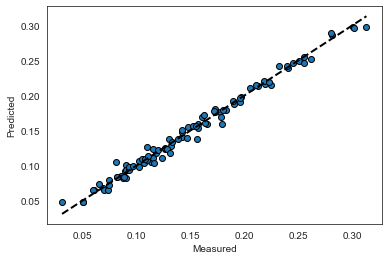

In [12]:
# training a model with 40 estimators and min_samples_leaf = 2, to compare with the first model created with less data
# and with the same features. Just like "retraining the model with new data"

X_train_original = X_train_YI[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)', 
                               'HPH - Energy consumption (kWh/kg)']]

original_RF_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, random_state = 0)
original_RF_model.fit(X_train_original, y_train_YI)

pred_original_RF = original_RF_model.predict(X_train_original)

print ('MAE:', mean_absolute_error(y_train_YI,pred_original_RF))
print('MAPE:' , mean_absolute_percentage_error(y_train_YI,pred_original_RF))
print('RSME:' , mean_squared_error(y_train_YI,pred_original_RF, squared = False))
print('R2:' , r2_score(y_train_YI,pred_original_RF))

fig, ax = plt.subplots()
ax.scatter(y_train_YI, pred_original_RF, edgecolors=(0, 0, 0))
ax.plot([y_train_YI.min(), y_train_YI.max()], [y_train_YI.min(), y_train_YI.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_5_A_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

MAE: 0.013005258428457175
MAPE: 0.14469142832051407
RSME: 0.01743502575281993
R2: 0.9432405463859876


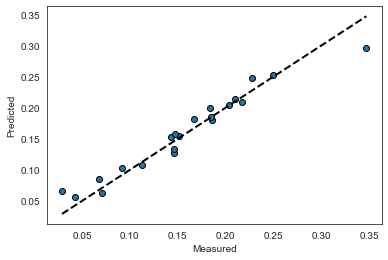

In [13]:
# now let's see how it works with the val subset

X_val_original = X_val_YI[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)', 
                               'HPH - Energy consumption (kWh/kg)']]

pred_original_RF_val = original_RF_model.predict(X_val_original)

print ('MAE:', mean_absolute_error(y_val_YI,pred_original_RF_val))
print('MAPE:' , mean_absolute_percentage_error(y_val_YI,pred_original_RF_val))
print('RSME:' , mean_squared_error(y_val_YI,pred_original_RF_val, squared = False))
print('R2:' , r2_score(y_val_YI,pred_original_RF_val))

fig, ax = plt.subplots()
ax.scatter(y_val_YI, pred_original_RF_val, edgecolors=(0, 0, 0))
ax.plot([y_val_YI.min(), y_val_YI.max()], [y_val_YI.min(), y_val_YI.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_5_B_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()


In [14]:
X_test_original = X_test_YI[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)', 
                               'HPH - Energy consumption (kWh/kg)']]

In [15]:
X_test_original_norec = X_test_original.drop('RecHenz80(3+3)')
X_test_YI_norec = X_test_YI.drop('RecHenz80(3+3)')
y_test_YI_norec = y_test_YI.drop(['RecHenz80(3+3)'])

MAE: 0.013242080263411903
MAPE: 0.08692896826947025
RSME: 0.02078122994095547
R2: 0.8830009613038039


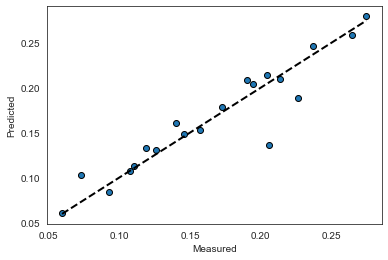

In [17]:
# since metrics are not so far off, we're gonna test it with a final subset

pred_original_RF_test = original_RF_model.predict(X_test_original_norec)

print ('MAE:', mean_absolute_error(y_test_YI_norec,pred_original_RF_test))
print('MAPE:' , mean_absolute_percentage_error(y_test_YI_norec,pred_original_RF_test))
print('RSME:' , mean_squared_error(y_test_YI_norec,pred_original_RF_test, squared = False))
print('R2:' , r2_score(y_test_YI_norec,pred_original_RF_test))

fig, ax = plt.subplots()
ax.scatter(y_test_YI_norec, pred_original_RF_test, edgecolors=(0, 0, 0))
ax.plot([y_test_YI_norec.min(), y_test_YI_norec.max()], [y_test_YI_norec.min(), y_test_YI_norec.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_5_C_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()


In [19]:
#gathering the results in XLS file

In [24]:
train_info_original_model = pd.DataFrame(pred_original_RF, index = y_train_YI.index)
train_info_original_model

,0
Sample,
UKSPHenz240(3+3+1),0.249210
SisalHenz80(3+3+1),0.178738
RecHenz240(3+3+3),0.297770
Recmec(3+1),0.079950
AspenHenz80(3),0.107757
...,...
JuteHenz80(3),0.099287
EucaHenz240(3),0.154026
BKSPmec(3),0.072735


In [33]:
df_train_info_original_model = pd.concat([y_train_YI,train_info_original_model], axis = 1)
df_train_info_original_model.columns = ['real_YI_values','predicted_YI_train_values_Fig5']
df_train_info_original_model

,real_YI_values,predicted_YI_train_values_Fig5
Sample,,
UKSPHenz240(3+3+1),0.250700,0.249210
SisalHenz80(3+3+1),0.182636,0.178738
RecHenz240(3+3+3),0.300140,0.297770
Recmec(3+1),0.074258,0.079950
AspenHenz80(3),0.109083,0.107757
...,...,...
JuteHenz80(3),0.096585,0.099287
EucaHenz240(3),0.156900,0.154026
BKSPmec(3),0.074598,0.072735


In [34]:
df_train_info_original_model.to_excel("yield_data.xlsx", sheet_name="train_data_Figure_5")

In [36]:
val_info_original_model = pd.DataFrame(pred_original_RF_val, index = y_val_YI.index)
val_info_original_model

df_val_info_original_model = pd.concat([y_val_YI,val_info_original_model], axis = 1)
df_val_info_original_model.columns = ['real_YI_values','predicted_YI_val_values_Fig5']
df_val_info_original_model

test_info_original_model = pd.DataFrame(pred_original_RF_test, index = y_test_YI_norec.index)
test_info_original_model

df_test_info_original_model = pd.concat([y_test_YI_norec,test_info_original_model], axis = 1)
df_test_info_original_model.columns = ['real_YI_values','predicted_YI_test_values_Fig5']
df_test_info_original_model

with pd.ExcelWriter("yield_data.xlsx") as writer:
    df_train_info_original_model.to_excel(writer, sheet_name="train_data_Figure_5")
    df_val_info_original_model.to_excel(writer, sheet_name="val_data_Figure_5")
    df_test_info_original_model.to_excel(writer, sheet_name="test_data_Figure_5")

In [18]:
#RF_model_enz_YI_v1 = 'RF_model_enz_YI_v1.pkl'
#pickle.dump(original_RF_model, open(RF_model_enz_YI_v1, 'wb'))

In [15]:
# now trying with bayesian optimization

from skopt import BayesSearchCV

In [16]:
from skopt.space import Real, Categorical, Integer

In [ ]:
#Now i'm gonna add a new parameter: concentration of enzyme and check how this works, if it improves the model.

In [14]:
# Creating dataframe
df_3 = pd.read_excel(r'C:\Users\Solange Iamin\Documents\Mestrado_UFPR\Pesquisa_PRH\Modelos\Props_nanoceluloses_2\tabela_dados_2_copia_artigo.xlsx')

# we know that the columns "Sample" should be the index of the table
df_3.index = df_3["Sample"]
df_3.drop("Sample", axis =1, inplace = True)
df_3

,Enzyme dosage (g/ton),Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Insoluble lignin (wt.%),Soluble lignin (wt.%),Extractives (wt.%),Ashes (wt.%),CrI (%),Aspect ratio,Yield of nanofibrillation (%)
Sample,,,,,,,,,,,,,,,
Eucamec(3),0,184,0.095,5.67,0.2646,0.308,0.742,0.174,0.008,0.058,0.013,0.005,NaN,155,0.102366
Eucamec(3+1),0,195,0.107,7.73,0.3936,0.296,0.742,0.174,0.008,0.058,0.013,0.005,NaN,168,0.115687
Eucamec(3+3),0,208,0.132,11.67,1.3856,0.267,0.742,0.174,0.008,0.058,0.013,0.005,NaN,179,0.165490
Eucamec(3+3+1),0,213,0.166,14.59,1.6720,0.273,0.742,0.174,0.008,0.058,0.013,0.005,NaN,200,0.189679
Eucamec(3+3+3),0,215,0.194,19.72,2.0968,0.245,0.742,0.174,0.008,0.058,0.013,0.005,NaN,220,0.204288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RecHenz240(3),240,176,0.075,5.67,1.0154,0.318,0.551,0.153,0.156,0.049,0.010,0.081,NaN,71,0.092897
RecHenz240(3+1),240,189,0.118,7.73,1.5009,0.253,0.551,0.153,0.156,0.049,0.010,0.081,NaN,72,0.138071
RecHenz240(3+3),240,205,0.184,11.67,1.6471,0.229,0.551,0.153,0.156,0.049,0.010,0.081,NaN,75,0.203436


In [15]:
df_3.columns

Index(['Enzyme dosage (g/ton)', 'Cationic demand (µeq/g)',
       'Transmittance at 600 nm (%)', 'HPH - Energy consumption (kWh/kg)',
       'Consistency index "k"', 'Flow index "n"', 'Cellulose (wt.%)',
       'Hemicellulose (wt.%)', 'Insoluble lignin (wt.%)',
       'Soluble lignin (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)',
       'CrI (%)', 'Aspect ratio', 'Yield of nanofibrillation (%)'],
      dtype='object')

In [16]:
# Summing soluble and insoluble ligning (so to get total ligning in raw material)
df_3['Total lignin (wt.%)'] = df_3['Insoluble lignin (wt.%)'] + df_3['Soluble lignin (wt.%)']
df_4 = df_3[['Enzyme dosage (g/ton)','Cationic demand (µeq/g)','Transmittance at 600 nm (%)','HPH - Energy consumption (kWh/kg)','Consistency index "k"','Flow index "n"','Cellulose (wt.%)','Hemicellulose (wt.%)','Total lignin (wt.%)','Extractives (wt.%)','Ashes (wt.%)','Aspect ratio',
       'Yield of nanofibrillation (%)']]
display(df_4)

,Enzyme dosage (g/ton),Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%),Aspect ratio,Yield of nanofibrillation (%)
Sample,,,,,,,,,,,,,
Eucamec(3),0,184,0.095,5.67,0.2646,0.308,0.742,0.174,0.066,0.013,0.005,155,0.102366
Eucamec(3+1),0,195,0.107,7.73,0.3936,0.296,0.742,0.174,0.066,0.013,0.005,168,0.115687
Eucamec(3+3),0,208,0.132,11.67,1.3856,0.267,0.742,0.174,0.066,0.013,0.005,179,0.165490
Eucamec(3+3+1),0,213,0.166,14.59,1.6720,0.273,0.742,0.174,0.066,0.013,0.005,200,0.189679
Eucamec(3+3+3),0,215,0.194,19.72,2.0968,0.245,0.742,0.174,0.066,0.013,0.005,220,0.204288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RecHenz240(3),240,176,0.075,5.67,1.0154,0.318,0.551,0.153,0.205,0.010,0.081,71,0.092897
RecHenz240(3+1),240,189,0.118,7.73,1.5009,0.253,0.551,0.153,0.205,0.010,0.081,72,0.138071
RecHenz240(3+3),240,205,0.184,11.67,1.6471,0.229,0.551,0.153,0.205,0.010,0.081,75,0.203436


In [17]:
# Checking only correlation variables between variables and Yield of nanofibrillation
df_4.corr().abs()['Yield of nanofibrillation (%)'].sort_values(ascending=False)

Yield of nanofibrillation (%)        1.000000
Transmittance at 600 nm (%)          0.981898
HPH - Energy consumption (kWh/kg)    0.726261
Cationic demand (µeq/g)              0.692499
Enzyme dosage (g/ton)                0.471275
Consistency index "k"                0.282223
Extractives (wt.%)                   0.242188
Flow index "n"                       0.226128
Aspect ratio                         0.059417
Total lignin (wt.%)                  0.046724
Ashes (wt.%)                         0.042045
Hemicellulose (wt.%)                 0.041159
Cellulose (wt.%)                     0.016527
Name: Yield of nanofibrillation (%), dtype: float64

In [18]:
#shuffling data

original_df_4 = shuffle(df_4, random_state=0)

# separating features and targets dataframes

# For the independent features:

X_v2 = original_df_4.iloc[:,0:-2].copy()

# For the targets:

#y_AR_v2 = original_df_4.iloc[:,-2].copy()
y_YI_v2 = original_df_4.iloc[:,-1].copy()

In [19]:
X_v2

,Enzyme dosage (g/ton),Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%)
Sample,,,,,,,,,,,
Hempmec(3),0,134,0.0350,5.67,1.4372,0.166,0.872,0.068,0.040,0.012,0.007
HempHenz240(3+3+3),240,221,0.2120,19.72,1.1170,0.262,0.878,0.067,0.043,0.005,0.006
EucaHenz80(3+3),80,216,0.1880,11.67,1.1993,0.193,0.788,0.135,0.068,0.005,0.004
HempHenz80(3),80,151,0.0690,5.67,0.1308,0.491,0.887,0.055,0.047,0.006,0.006
Aspenmec(3+3),0,196,0.1280,11.67,0.6667,0.369,0.471,0.194,0.313,0.008,0.013
...,...,...,...,...,...,...,...,...,...,...,...
EucaHenz80(3+3+3),80,232,0.2412,19.72,1.7978,0.125,0.788,0.135,0.068,0.005,0.004
AspenHenz240(3+3+1),240,230,0.2180,14.59,1.8546,0.195,0.464,0.182,0.330,0.009,0.015
SisalHenz80(3+3),80,194,0.1490,11.67,0.3665,0.511,0.887,0.159,0.061,0.012,0.007


In [20]:
y_YI_v2

Sample
Hempmec(3)             0.050913
HempHenz240(3+3+3)     0.240456
EucaHenz80(3+3)        0.209500
HempHenz80(3)          0.065390
Aspenmec(3+3)          0.145699
                         ...   
EucaHenz80(3+3+3)      0.249400
AspenHenz240(3+3+1)    0.237231
SisalHenz80(3+3)       0.160236
TMPHenz240(3+3)        0.157330
Hempmec(3+3)           0.095259
Name: Yield of nanofibrillation (%), Length: 140, dtype: float64

In [21]:
# train, validation and test splits for aspect ratio

X_train_YI_v2, X_test_YI_v2, y_train_YI_v2, y_test_YI_v2 = train_test_split(X_v2, y_YI_v2, train_size = 0.7, test_size = 0.3, random_state = 78)

X_test_YI_v2, X_val_YI_v2, y_test_YI_v2, y_val_YI_v2 = train_test_split(X_test_YI_v2, y_test_YI_v2, train_size = 0.5, test_size = 0.5, random_state = 78)

In [127]:
# saving the data
#X.to_csv('new_features_YI.csv', index = False)
#y_YI.to_csv('new_targets_YI.csv', index = False)

#X_train_YI.to_csv('new_train_features_YI.csv', index = False)
#X_test_YI.to_csv('new_test_features_YI.csv', index = False)
#X_val_YI.to_csv('new_val_features_YI.csv', index = False)

#y_train_YI.to_csv('new_train_targets_YI.csv', index = False)
#y_test_YI.to_csv('new_test_targets_YI.csv', index = False)
#y_val_YI.to_csv('new_val_targets_YI.csv', index = False)

In [128]:
# saving the data
#X_v2.to_csv('new_features_v2_YI.csv', index = False)
#y_YI_v2.to_csv('new_targets_YI_v2.csv', index = False)

#X_train_YI_v2.to_csv('new_train_features_YI_v2.csv', index = False)
#X_test_YI_v2.to_csv('new_test_features_YI_v2.csv', index = False)
#X_val_YI_v2.to_csv('new_val_features_YI_v2.csv', index = False)

#y_train_YI_v2.to_csv('new_train_targets_YI_v2.csv', index = False)
#y_test_YI_v2.to_csv('new_test_targets_YI_v2.csv', index = False)
#y_val_YI_v2.to_csv('new_val_targets_YI_v2.csv', index = False)

In [17]:
bay_n_estimators = Integer(1,150) # number of trees in the random forest
bay_max_features_3 = Integer(1,11) # number of features in consideration at every split
bay_max_depth = Integer(1,50) # maximum number of levels allowed in each decision tree
bay_min_samples_leaf =Integer(1,4) # CHANGING TO 1-4


bay_grid_3 = {'n_estimators': bay_n_estimators,

'max_features': bay_max_features_3,

'max_depth': bay_max_depth,

'min_samples_leaf': bay_min_samples_leaf}

In [18]:
opt_3 = BayesSearchCV(estimator = RandomForestRegressor(), search_spaces = bay_grid_3, n_iter = 50, cv = 5,
                     verbose=0, random_state=35, n_jobs = -1)
       

opt_3.fit(X_train_YI_v2, y_train_YI_v2)

BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=11, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=150, prior='uniform', transform='normalize')})

In [19]:
print ('Bayesian grid: ', opt_3, '\n')
# print the best parameters
print ('Best Parameters: ', opt_3.best_params_, ' \n')

Bayesian grid:  BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=11, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=150, prior='uniform', transform='normalize')}) 

Best Parameters:  OrderedDict([('max_depth', 38), ('max_features', 10), ('min_samples_leaf', 1), ('n_estimators', 150)])  



In [20]:
opt_3.best_score_

0.9570480983719747

In [44]:
# using the best parameters

RF_bay_4 = RandomForestRegressor(n_estimators = 150,  min_samples_leaf= 1, max_features= 10, max_depth= 38, 
                                 random_state = 13) 
RF_bay_4.fit(X_train_YI_v2, y_train_YI_v2) 

RandomForestRegressor(max_depth=38, max_features=10, n_estimators=150,
                      random_state=13)

MAE: 0.0037797465942759553
MAPE: 0.03226891400257876
RSME: 0.004925260013888972
R2: 0.9940800809830486


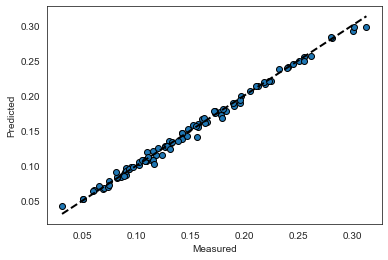

In [46]:
RF_bay_4_pred = RF_bay_4.predict(X_train_YI_v2)

print ('MAE:', mean_absolute_error(y_train_YI_v2,RF_bay_4_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train_YI_v2,RF_bay_4_pred))
print('RSME:' , mean_squared_error(y_train_YI_v2,RF_bay_4_pred, squared = False))
print('R2:' , r2_score(y_train_YI_v2,RF_bay_4_pred))

fig, ax = plt.subplots()
ax.scatter(y_train_YI_v2, RF_bay_4_pred, edgecolors=(0, 0, 0))
ax.plot([y_train_YI_v2.min(), y_train_YI_v2.max()], [y_train_YI_v2.min(), y_train_YI_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_6_A_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

MAE: 0.013302086846893116
MAPE: 0.13812440746119325
RSME: 0.01809249879656573
R2: 0.9388790459572386


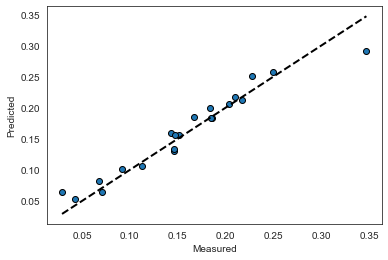

In [47]:
RF_bay_4_pred_val = RF_bay_4.predict(X_val_YI_v2)

print ('MAE:', mean_absolute_error(y_val_YI_v2,RF_bay_4_pred_val))
print('MAPE:' , mean_absolute_percentage_error(y_val_YI_v2,RF_bay_4_pred_val))
print('RSME:' , mean_squared_error(y_val_YI_v2,RF_bay_4_pred_val, squared = False))
print('R2:' , r2_score(y_val_YI_v2,RF_bay_4_pred_val))

fig, ax = plt.subplots()
ax.scatter(y_val_YI_v2,RF_bay_4_pred_val, edgecolors=(0, 0, 0))
ax.plot([y_val_YI_v2.min(), y_val_YI_v2.max()], [y_val_YI_v2.min(), y_val_YI_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_6_B_article_v2_version.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [48]:
#RF_results_compiled_3_YI_case1 = 'RF_results_compiled_3_YI_case1.pkl'
#pickle.dump(RF_bay_4, open(RF_results_compiled_3_YI_case1, 'wb'))

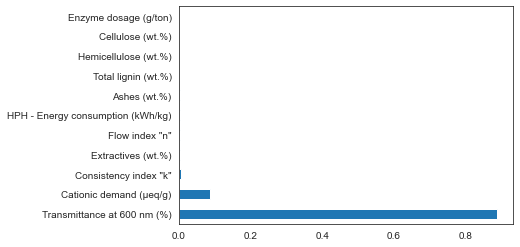

In [49]:
feat_importances_model_randmf_new_bay = pd.Series(RF_bay_4.feature_importances_, index=X_train_YI_v2.columns)
plt.savefig('Figure_7_v2_article.png', dpi=600, bbox_inches = "tight") 
feat_importances_model_randmf_new_bay.nlargest(11).plot(kind='barh');

In [68]:
feat_importances_model_randmf_new_bay

Enzyme dosage (g/ton)                0.000758
Cationic demand (µeq/g)              0.088093
Transmittance at 600 nm (%)          0.888097
HPH - Energy consumption (kWh/kg)    0.002745
Consistency index "k"                0.006741
Flow index "n"                       0.002801
Cellulose (wt.%)                     0.001609
Hemicellulose (wt.%)                 0.001768
Total lignin (wt.%)                  0.001787
Extractives (wt.%)                   0.003010
Ashes (wt.%)                         0.002591
dtype: float64

MAE: 0.011083376407188544
MAPE: 0.06724924216448824
RSME: 0.017951936776351155
R2: 0.912690315669789


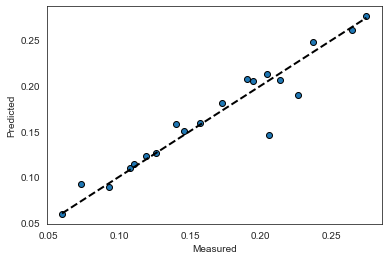

In [55]:
RF_bay_4_pred_test = RF_bay_4.predict(X_test_YI_v2_norec)

print ('MAE:', mean_absolute_error(y_test_YI_v2_norec,RF_bay_4_pred_test))
print('MAPE:' , mean_absolute_percentage_error(y_test_YI_v2_norec,RF_bay_4_pred_test))
print('RSME:' , mean_squared_error(y_test_YI_v2_norec,RF_bay_4_pred_test, squared = False))
print('R2:' , r2_score(y_test_YI_v2_norec,RF_bay_4_pred_test))

fig, ax = plt.subplots()
ax.scatter(y_test_YI_v2_norec,RF_bay_4_pred_test, edgecolors=(0, 0, 0))
ax.plot([y_test_YI_v2_norec.min(), y_test_YI_v2_norec.max()], [y_test_YI_v2_norec.min(), y_test_YI_v2_norec.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_6_C_article_v2_version.png', dpi=600, bbox_inches = "tight") 

plt.show()

In [58]:
train_info_11_feature_model = pd.DataFrame(RF_bay_4_pred, index = y_train_YI_v2.index)

df_train_info_11_feature_model = pd.concat([y_train_YI_v2,train_info_11_feature_model], axis = 1)
df_train_info_11_feature_model.columns = ['real_YI_values','predicted_YI_train_values_Fig6']

val_info_11_feature_model = pd.DataFrame(RF_bay_4_pred_val, index = y_val_YI_v2.index)

df_val_info_11_feature_model = pd.concat([y_val_YI_v2,val_info_11_feature_model], axis = 1)
df_val_info_11_feature_model.columns = ['real_YI_values','predicted_YI_val_values_Fig6']

test_info_11_feature_model = pd.DataFrame(RF_bay_4_pred_test, index = y_test_YI_v2_norec.index)

df_test_info_11_feature_model = pd.concat([y_test_YI_v2_norec,test_info_11_feature_model], axis = 1)
df_test_info_11_feature_model.columns = ['real_YI_values','predicted_YI_test_values_Fig6']

with pd.ExcelWriter("yield_data.xlsx") as writer:
    df_train_info_original_model.to_excel(writer, sheet_name="train_data_Figure_5")
    df_val_info_original_model.to_excel(writer, sheet_name="val_data_Figure_5")
    df_test_info_original_model.to_excel(writer, sheet_name="test_data_Figure_5")
    df_train_info_11_feature_model.to_excel(writer, sheet_name="train_data_Figure_6")
    df_val_info_11_feature_model.to_excel(writer, sheet_name="val_data_Figure_6")
    df_test_info_11_feature_model.to_excel(writer, sheet_name="test_data_Figure_6")

In [10]:
#testing same architecture but with top 2 features only

In [ ]:
X_train_YI_random_4 = X_train_YI_v2[['Cationic demand (µeq/g)',
       'Transmittance at 600 nm (%)']]
X_val_YI_random_4 = X_val_YI_v2[['Cationic demand (µeq/g)',
       'Transmittance at 600 nm (%)']]

X_test_YI_random_4 = X_test_YI_v2[['Cationic demand (µeq/g)',
       'Transmittance at 600 nm (%)']]

X_test_YI_random_4_norec = X_test_YI_random_4.drop('RecHenz80(3+3)')

In [30]:
# using the best parameters

RF_bay_4_v2 = RandomForestRegressor(n_estimators = 150,  min_samples_leaf= 1, max_features= 2, max_depth= 38, 
                                 random_state = 13) 
RF_bay_4_v2.fit(X_train_YI_random_4, y_train_YI_v2) 

RandomForestRegressor(max_depth=38, max_features=2, n_estimators=150,
                      random_state=13)

MAE: 0.0036506714146186817
MAPE: 0.030853740316473508
RSME: 0.004800805186659479
R2: 0.9943754781754449


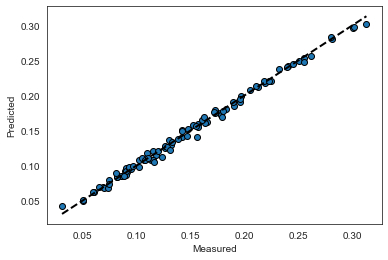

In [31]:
RF_bay_4_pred_v2 = RF_bay_4_v2.predict(X_train_YI_random_4)

print ('MAE:', mean_absolute_error(y_train_YI_v2,RF_bay_4_pred_v2))
print('MAPE:' , mean_absolute_percentage_error(y_train_YI_v2,RF_bay_4_pred_v2))
print('RSME:' , mean_squared_error(y_train_YI_v2,RF_bay_4_pred_v2, squared = False))
print('R2:' , r2_score(y_train_YI_v2,RF_bay_4_pred_v2))

fig, ax = plt.subplots()
ax.scatter(y_train_YI_v2, RF_bay_4_pred_v2, edgecolors=(0, 0, 0))
ax.plot([y_train_YI_v2.min(), y_train_YI_v2.max()], [y_train_YI_v2.min(), y_train_YI_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_24_newdata_YIELD.png', dpi=600, bbox_inches = "tight") 
plt.show()

MAE: 0.014278886180348348
MAPE: 0.153840784668238
RSME: 0.018475811970690748
R2: 0.936261757049461


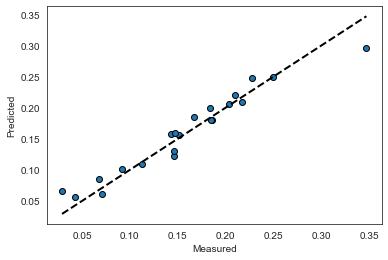

In [32]:
RF_bay_4_pred_val_v2 = RF_bay_4_v2.predict(X_val_YI_random_4)

print ('MAE:', mean_absolute_error(y_val_YI_v2,RF_bay_4_pred_val_v2))
print('MAPE:' , mean_absolute_percentage_error(y_val_YI_v2,RF_bay_4_pred_val_v2))
print('RSME:' , mean_squared_error(y_val_YI_v2,RF_bay_4_pred_val_v2, squared = False))
print('R2:' , r2_score(y_val_YI_v2,RF_bay_4_pred_val_v2))

fig, ax = plt.subplots()
ax.scatter(y_val_YI_v2,RF_bay_4_pred_val_v2, edgecolors=(0, 0, 0))
ax.plot([y_val_YI_v2.min(), y_val_YI_v2.max()], [y_val_YI_v2.min(), y_val_YI_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.savefig('Figure_25_newdata_YIELD.png', dpi=600, bbox_inches = "tight") 
plt.show()

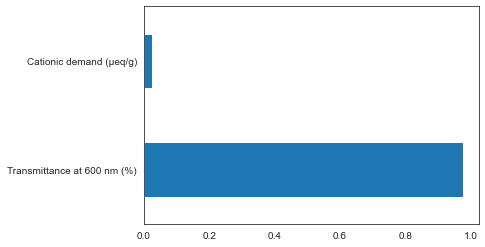

In [33]:
feat_importances_model_randmf_new_bay = pd.Series(RF_bay_4_v2.feature_importances_, index=X_train_YI_random_4.columns)
#plt.savefig('Figure_26_newdata_YIELD.png', dpi=600, bbox_inches = "tight") 
feat_importances_model_randmf_new_bay.nlargest(11).plot(kind='barh');

MAE: 0.013723413439184267
MAPE: 0.09379206769513343
RSME: 0.02109601373812111
R2: 0.8794296290433777


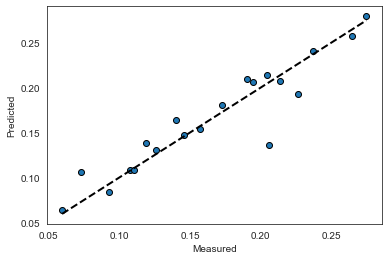

In [34]:
RF_bay_4_pred_test_v2 = RF_bay_4_v2.predict(X_test_YI_random_4_norec)

print ('MAE:', mean_absolute_error(y_test_YI_v2_norec,RF_bay_4_pred_test_v2))
print('MAPE:' , mean_absolute_percentage_error(y_test_YI_v2_norec,RF_bay_4_pred_test_v2))
print('RSME:' , mean_squared_error(y_test_YI_v2_norec,RF_bay_4_pred_test_v2, squared = False))
print('R2:' , r2_score(y_test_YI_v2_norec,RF_bay_4_pred_test_v2))

fig, ax = plt.subplots()
ax.scatter(y_test_YI_v2_norec,RF_bay_4_pred_test_v2, edgecolors=(0, 0, 0))
ax.plot([y_test_YI_v2_norec.min(), y_test_YI_v2_norec.max()], [y_test_YI_v2_norec.min(), y_test_YI_v2_norec.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")

plt.show()

In [ ]:
bay_n_estimators = Integer(1,150) # number of trees in the random forest
bay_max_features_4 = Integer(1,2) # number of features in consideration at every split
bay_max_depth = Integer(1,50) # maximum number of levels allowed in each decision tree
bay_min_samples_leaf =Integer(1,4) # CHANGING TO 1-4


bay_grid_4 = {'n_estimators': bay_n_estimators,

'max_features': bay_max_features_4,

'max_depth': bay_max_depth,

'min_samples_leaf': bay_min_samples_leaf}

In [36]:
# i will try now to do a bay search with the 2 features selected:

opt_4 = BayesSearchCV(estimator = RandomForestRegressor(), search_spaces = bay_grid_4, n_iter = 50, cv = 5,
                     verbose=0, random_state=35, n_jobs = -1)
       

opt_4.fit(X_train_YI_random_4, y_train_YI_v2)

BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...],
                             'max_features': [1, 2],
                             'min_samples_leaf': [1, 2, 3, 4],
                             'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]})

In [37]:
print ('Bayesian grid: ', opt_4, '\n')
# print the best parameters
print ('Best Parameters: ', opt_4.best_params_, ' \n')

Bayesian grid:  BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
              random_state=35,
              search_spaces={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...],
                             'max_features': [1, 2],
                             'min_samples_leaf': [1, 2, 3, 4],
                             'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]}) 

Best Parameters:  OrderedDict([('max_depth', 14), ('max_features', 2), ('min_samples_leaf', 1), ('n_estimators', 81)])  



In [38]:
opt_4.best_score_

0.9599628226628589

In [32]:
# using the best parameters

RF_bay_5 = RandomForestRegressor(n_estimators = 81,  min_samples_leaf= 1, max_features= 2, max_depth= 14, 
                                 random_state = 13) 
RF_bay_5.fit(X_train_YI_random_4, y_train_YI_v2) 

RandomForestRegressor(max_depth=14, max_features=2, n_estimators=81,
                      random_state=13)

MAE: 0.003754822386784995
MAPE: 0.032104319272472134
RSME: 0.004858483754692313
R2: 0.9942395163247291


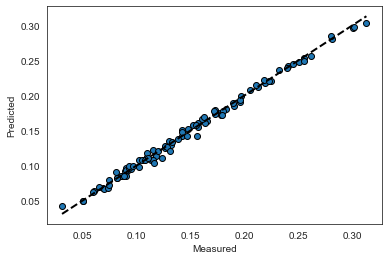

In [33]:
RF_bay_5_pred = RF_bay_5.predict(X_train_YI_random_4)

print ('MAE:', mean_absolute_error(y_train_YI_v2,RF_bay_5_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train_YI_v2,RF_bay_5_pred))
print('RSME:' , mean_squared_error(y_train_YI_v2,RF_bay_5_pred, squared = False))
print('R2:' , r2_score(y_train_YI_v2,RF_bay_5_pred))

fig, ax = plt.subplots()
ax.scatter(y_train_YI_v2,RF_bay_5_pred, edgecolors=(0, 0, 0))
ax.plot([y_train_YI_v2.min(), y_train_YI_v2.max()], [y_train_YI_v2.min(), y_train_YI_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_8_A_v2_manuscript.png', dpi=600, bbox_inches = "tight") 
plt.show()

MAE: 0.014635489130184835
MAPE: 0.15468927648736597
RSME: 0.018767527799991506
R2: 0.9342331326970418


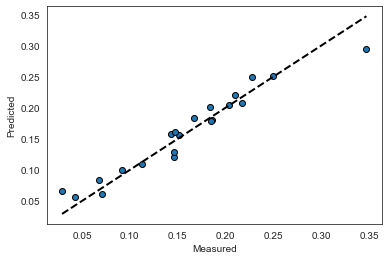

In [34]:
RF_bay_5_pred_val = RF_bay_5.predict(X_val_YI_random_4)

print ('MAE:', mean_absolute_error(y_val_YI_v2,RF_bay_5_pred_val))
print('MAPE:' , mean_absolute_percentage_error(y_val_YI_v2,RF_bay_5_pred_val))
print('RSME:' , mean_squared_error(y_val_YI_v2,RF_bay_5_pred_val, squared = False))
print('R2:' , r2_score(y_val_YI_v2,RF_bay_5_pred_val))

fig, ax = plt.subplots()
ax.scatter(y_val_YI_v2,RF_bay_5_pred_val, edgecolors=(0, 0, 0))
ax.plot([y_val_YI_v2.min(), y_val_YI_v2.max()], [y_val_YI_v2.min(), y_val_YI_v2.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_8_B_v2_manuscript.png', dpi=600, bbox_inches = "tight") 
plt.show()

In [65]:
#RF_results_compiled_3_YI_case2 = 'RF_results_compiled_3_YI_case2.pkl'
#pickle.dump(RF_bay_5, open(RF_results_compiled_3_YI_case2, 'wb'))

MAE: 0.013786180673914655
MAPE: 0.09402348224149176
RSME: 0.02133605586927239
R2: 0.8766701856682809


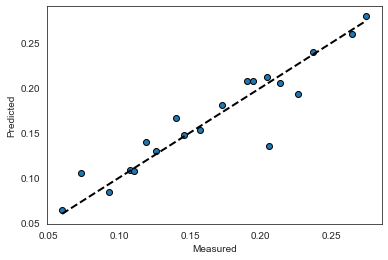

In [66]:
RF_bay_5_pred_test  = RF_bay_5.predict(X_test_YI_random_4_norec)

print ('MAE:', mean_absolute_error(y_test_YI_v2_norec,RF_bay_5_pred_test ))
print('MAPE:' , mean_absolute_percentage_error(y_test_YI_v2_norec,RF_bay_5_pred_test ))
print('RSME:' , mean_squared_error(y_test_YI_v2_norec,RF_bay_5_pred_test  , squared = False))
print('R2:' , r2_score(y_test_YI_v2_norec,RF_bay_5_pred_test ))

fig, ax = plt.subplots()
ax.scatter(y_test_YI_v2_norec, RF_bay_5_pred_test , edgecolors=(0, 0, 0))
ax.plot([y_test_YI_v2_norec.min(), y_test_YI_v2_norec.max()], [y_test_YI_v2_norec.min(), y_test_YI_v2_norec.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_8_C_v2_manuscript.png', dpi=600, bbox_inches = "tight")  
plt.show()

In [30]:
#juntando a validação e o teste 

X_val_test_YI_random_4_norec = pd.concat([X_val_YI_random_4, X_test_YI_random_4_norec])

y_val_test_YI_random_4 = pd.concat([y_val_YI_v2,y_test_YI_v2_norec])

In [28]:
X_val_test_YI_random_4

,Cationic demand (µeq/g),Transmittance at 600 nm (%)
Sample,,
TMPHenz80(3+3+1),217,0.1560
EucaHenz80(3+3),216,0.1880
BTMPmec(3),156,0.0410
RecHenz240(3+3),205,0.1840
HempHenz80(3+3+3),210,0.1640
TMPmec(3+3),170,0.0590
Sisalmec(3+1),145,0.0520
UKSPHenz240(3+3),207,0.1850
AspenHenz240(3),209,0.0860


In [29]:
y_val_test_YI_random_4

Sample
TMPHenz80(3+3+1)       0.166913
EucaHenz80(3+3)        0.209500
BTMPmec(3)             0.029000
RecHenz240(3+3)        0.203436
HempHenz80(3+3+3)      0.185626
TMPmec(3+3)            0.067400
Sisalmec(3+1)          0.070468
UKSPHenz240(3+3)       0.217000
AspenHenz240(3)        0.112592
EucaHenz80(3+3+1)      0.227400
EucaHenz240(3+3+3)     0.347315
Hempmec(3+3+3)         0.150877
AspenHenz240(3+1)      0.143273
EucaHenz80(3+3+3)      0.249400
HempHenz240(3+3)       0.145650
BKSPHenz240(3+3)       0.147179
EucaHenz240(3+1)       0.184755
Sisalmec(3+3+3)        0.145879
TMPmec(3+1)            0.042200
TMPHenz240(3+3+1)      0.184092
Recmec(3+3)            0.092016
TMPmec(3+3+1)          0.073100
JuteHenz80(3+3)        0.190237
BKSPHenz80(3+3+1)      0.140365
SisalHenz80(3+1)       0.118697
SisalHenz240(3+3+1)    0.213685
Aspenmec(3+3)          0.145699
Recmec(3)              0.059687
AspenHenz240(3+3+1)    0.237231
UKSPHenz80(3+3+3)      0.226300
Jutemec(3+3+1)         0.156898
A

MAE: 0.014221192322248161
MAPE: 0.1250962061235249
RSME: 0.020061592777346173
R2: 0.9117022663411621


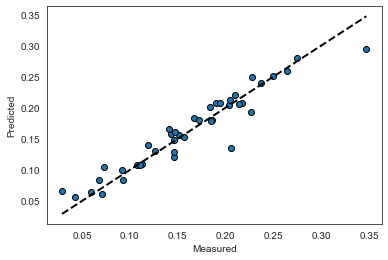

In [35]:
RF_bay_5_pred_val_test  = RF_bay_5.predict(X_val_test_YI_random_4_norec)

print ('MAE:', mean_absolute_error(y_val_test_YI_random_4,RF_bay_5_pred_val_test ))
print('MAPE:' , mean_absolute_percentage_error(y_val_test_YI_random_4,RF_bay_5_pred_val_test ))
print('RSME:' , mean_squared_error(y_val_test_YI_random_4,RF_bay_5_pred_val_test  , squared = False))
print('R2:' , r2_score(y_val_test_YI_random_4,RF_bay_5_pred_val_test ))

fig, ax = plt.subplots()
ax.scatter(y_val_test_YI_random_4, RF_bay_5_pred_val_test , edgecolors=(0, 0, 0))
ax.plot([y_val_test_YI_random_4.min(), y_val_test_YI_random_4.max()], [y_val_test_YI_random_4.min(), y_val_test_YI_random_4.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
#plt.savefig('Figure_8_C_v2_manuscript.png', dpi=600, bbox_inches = "tight")  
plt.show()

In [69]:
train_info_2_feature_model = pd.DataFrame(RF_bay_5_pred, index = y_train_YI_v2.index)

df_train_info_2_feature_model = pd.concat([y_train_YI_v2,train_info_2_feature_model], axis = 1)
df_train_info_2_feature_model.columns = ['real_YI_values','predicted_YI_train_values_Fig8']

val_info_2_feature_model = pd.DataFrame(RF_bay_5_pred_val, index = y_val_YI_v2.index)

df_val_info_2_feature_model = pd.concat([y_val_YI_v2,val_info_2_feature_model], axis = 1)
df_val_info_2_feature_model.columns = ['real_YI_values','predicted_YI_val_values_Fig8']

test_info_2_feature_model = pd.DataFrame(RF_bay_5_pred_test, index = y_test_YI_v2_norec.index)

df_test_info_2_feature_model = pd.concat([y_test_YI_v2_norec,test_info_2_feature_model], axis = 1)
df_test_info_2_feature_model.columns = ['real_YI_values','predicted_YI_test_values_Fig8']

with pd.ExcelWriter("yield_data.xlsx") as writer:
    df_train_info_original_model.to_excel(writer, sheet_name="train_data_Figure_5")
    df_val_info_original_model.to_excel(writer, sheet_name="val_data_Figure_5")
    df_test_info_original_model.to_excel(writer, sheet_name="test_data_Figure_5")
    df_train_info_11_feature_model.to_excel(writer, sheet_name="train_data_Figure_6")
    df_val_info_11_feature_model.to_excel(writer, sheet_name="val_data_Figure_6")
    df_test_info_11_feature_model.to_excel(writer, sheet_name="test_data_Figure_6")
    df_train_info_2_feature_model.to_excel(writer, sheet_name="train_data_Figure_8")
    df_val_info_2_feature_model.to_excel(writer, sheet_name="val_data_Figure_8")
    df_test_info_2_feature_model.to_excel(writer, sheet_name="test_data_Figure_8")
    feat_importances_model_randmf_new_bay.to_excel(writer, sheet_name="feature_importance_Figure_7")